In [2]:
import distutils.spawn
import itertools
import os

from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from transformers import AutoTokenizer, BertModel

/Users/pmarion/miniforge3/envs/single-location-regression/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
os.makedirs("figures", exist_ok=True)
os.makedirs("pickles", exist_ok=True)

In [4]:
sns.set(font_scale=1.15)
if distutils.spawn.find_executable('latex'):
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)

/var/folders/5t/1858x_sn3kz5tw252hv5nw3w0000gn/T/ipykernel_50656/1401616683.py:2: DeprecationWarning: Use shutil.which instead of find_executable
  if distutils.spawn.find_executable('latex'):


In [5]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

/Users/pmarion/miniforge3/envs/single-location-regression/lib/python3.9/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/pmarion/miniforge3/envs/single-location-regression/lib/python3.9/site-packages/transformers/modeling_utils.py:415: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be

In [6]:
# The examples are obtained by doing a cartesian product over all words in the lists.
# The label is obtained as the product of the numbers after the words.
train_lists_a = {
    'city': [('The city is', 1)],
    'city_size': [('nice.', 1), ('dreadful.', 1), ('clean.', 1), ('dirty.', 1)],
    'pronouns': [('my', 1), ('his', 1), ('her', 1), ('our', 1)],
    'color': [('', 1), ('blue', 1), ('orange', 1), ('beige', 1), ('green', 1), ('red', 1)],
    'animal': [('dog', 1), ('owl', 1), ('cow', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('very', 1), ('extremely', 1)],
    'adjective': [('nice', 1), ('mean', -1), ('cute', 1), ('dreadful', -1), ('aggressive', -1), ('delightful', 1)],
}

In [7]:
# another order.
train_lists_b = {
    'city': [('The city is', 1)],
    'city_size': [('nice.', 1), ('dreadful.', 1), ('clean.', 1), ('dirty.', 1)],
    'pronouns': [('my', 1), ('his', 1), ('her', 1), ('our', 1)],
    'color': [('', 1), ('blue', 1), ('orange', 1), ('beige', 1), ('green', 1), ('red', 1)],
    'adjective': [('nice', 1), ('mean', -1), ('cute', 1), ('dreadful', -1), ('aggressive', -1), ('delightful', 1)],
    'animal': [('dog', 1), ('owl', 1), ('cow', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('very', 1), ('extremely', 1)],
    'size': [('tiny', 1), ('giant', 1)],
}

In [8]:
test_lists_a = {
    'city': [('The city is', 1)],
    'city_size': [('nice.', 1), ('dreadful.', 1), ('clean.', 1), ('dirty.', 1)],
    'pronouns': [('their', 1), ('your', 1)],
    'color': [('purple', 1), ('gray', 1)],
    'adjective': [('nice', 1), ('mean', -1), ('cute', 1), ('dreadful', -1), ('aggressive', -1), ('delightful', 1)],
    'animal': [('cat', 1), ('eagle', 1), ('goat', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('especially', 1)],
    'size': [('big', 1), ('little', 1), ('mini', 1), ('enormous', 1)],
}

In [9]:
# another order.
test_lists_b = {
    'city': [('The city is', 1)],
    'city_size': [('nice.', 1), ('dreadful.', 1), ('clean.', 1), ('dirty.', 1)],
    'pronouns': [('their', 1), ('your', 1)],
    'color': [('purple', 1), ('gray', 1)],
    'adjective': [('nice', 1), ('mean', -1), ('cute', 1), ('dreadful', -1), ('aggressive', -1), ('delightful', 1)],
    'animal': [('cat', 1), ('eagle', 1), ('goat', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('especially', 1)],
    'size': [('big', 1), ('little', 1), ('mini', 1), ('enormous', 1)],
}

In [10]:
# change the words that generate the labels.
test_lists_c = {
    'city': [('The city is', 1)],
    'city_size': [('nice.', 1), ('dreadful.', 1), ('clean.', 1), ('dirty.', 1)],
    'greetings': [('Good evening,', 1)],
    'pronouns': [('their', 1), ('your', 1)],
    'size': [('big', 1), ('little', 1), ('mini', 1), ('enormous', 1)],
    'color': [('purple', 1), ('gray', 1)],
    'animal': [('cat', 1), ('eagle', 1), ('goat', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('especially', 1)],
    'adjective': [('lovely', 1), ('nasty', -1), ('charming', 1), ('foul', -1)],
}

In [11]:
# change the words that generate the labels + another order.
test_lists_d = {
    'city': [('The city is', 1)],
    'city_size': [('nice.', 1), ('dreadful.', 1), ('clean.', 1), ('dirty.', 1)],
    'greetings': [('Good evening,', 1)],
    'pronouns': [('their', 1), ('your', 1)],
    'adjective': [('lovely', 1), ('nasty', -1), ('charming', 1), ('foul', -1)],
    'color': [('purple', 1), ('gray', 1)],
    'animal': [('cat', 1), ('eagle', 1), ('goat', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('especially', 1)],
    'size': [('big', 1), ('little', 1), ('mini', 1), ('enormous', 1)],
}

In [12]:
# change the sentence.
test_lists_e = {
    'question': [('Hello, how are you?', 1)],
    'greetings': [('Good evening,', 1)],
    'pronouns': [('their', 1), ('your', 1)],
    'color': [('purple', 1), ('gray', 1)],
    'animal': [('cat', 1), ('eagle', 1), ('goat', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('especially', 1)],
    'adjective': [('nice', 1), ('mean', -1), ('cute', 1), ('dreadful', -1), ('aggressive', -1), ('delightful', 1)],
}

In [13]:
# change the sentence and the words that generate the labels.
test_lists_f = {
    'question': [('Hello, how are you?', 1)],
    'greetings': [('Good evening,', 1)],
    'pronouns': [('their', 1), ('your', 1)],
    'color': [('purple', 1), ('gray', 1)],
    'animal': [('cat', 1), ('eagle', 1), ('goat', 1)],
    'verb': [('is', 1)],
    '(adverb': [('', 1), ('especially', 1)],
    'adjective': [('lovely', 1), ('nasty', -1), ('charming', 1), ('foul', -1)],
}

In [14]:
def create(raw_lists):
    X = []
    y = []
    for sentence in itertools.product(*raw_lists.values()):
        X.append(' '.join([word[0] for word in sentence]).replace('  ', ' ').strip())
        y.append(np.prod([word[1] for word in sentence]))
    return X, y

In [15]:
train_X_a, train_y_a = create(train_lists_a)
train_X_b, train_y_b = create(train_lists_b)
train_X_total = train_X_a + train_X_b
train_y_total = train_y_a + train_y_b

In [16]:
test_X_a, test_y_a = create(test_lists_a)
test_X_b, test_y_b = create(test_lists_b)
test_X_c, test_y_c = create(test_lists_c)
test_X_d, test_y_d = create(test_lists_d)
test_X_e, test_y_e = create(test_lists_e)
test_X_f, test_y_f = create(test_lists_f)

In [17]:
def go_through_transformers(sentence_list):
    result = []
    for k, sentence in enumerate(sentence_list):
        if k % 100 == 0:
            print(k)
        inputs = tokenizer(sentence, return_tensors="pt")
        result_k = []
        outputs = model(**inputs, output_hidden_states=True)
        for state in outputs.hidden_states:
            # select only the first token of each sequence, i.e., [CLS] token
            result_k.append(state[0][0].detach().numpy())
        result.append(np.stack(result_k))
    return np.stack(result)

In [18]:
hidden_states_train = go_through_transformers(train_X_total)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500


In [19]:
hidden_states_train.shape

(15552, 13, 768)

In [20]:
with open('pickles/hidden_states_train_X.pickle', 'wb') as f:
    pickle.dump(hidden_states_train, f, pickle.HIGHEST_PROTOCOL)

In [6]:
with open('pickles/hidden_states_train_X.pickle', 'rb') as f:
    hidden_states_train = pickle.load(f)

In [21]:
hidden_states_test_X_a = go_through_transformers(test_X_a)
hidden_states_test_X_b = go_through_transformers(test_X_b)
hidden_states_test_X_c = go_through_transformers(test_X_c)
hidden_states_test_X_d = go_through_transformers(test_X_d)
hidden_states_test_X_e = go_through_transformers(test_X_e)
hidden_states_test_X_f = go_through_transformers(test_X_f)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
0
100
0


In [22]:
with open('pickles/hidden_states_test_X_a.pickle', 'wb') as f:
    pickle.dump(hidden_states_test_X_a, f, pickle.HIGHEST_PROTOCOL)
with open('pickles/hidden_states_test_X_b.pickle', 'wb') as f:
    pickle.dump(hidden_states_test_X_b, f, pickle.HIGHEST_PROTOCOL)
with open('pickles/hidden_states_test_X_c.pickle', 'wb') as f:
    pickle.dump(hidden_states_test_X_c, f, pickle.HIGHEST_PROTOCOL)
with open('pickles/hidden_states_test_X_d.pickle', 'wb') as f:
    pickle.dump(hidden_states_test_X_d, f, pickle.HIGHEST_PROTOCOL)
with open('pickles/hidden_states_test_X_e.pickle', 'wb') as f:
    pickle.dump(hidden_states_test_X_e, f, pickle.HIGHEST_PROTOCOL)
with open('pickles/hidden_states_test_X_f.pickle', 'wb') as f:
    pickle.dump(hidden_states_test_X_f, f, pickle.HIGHEST_PROTOCOL)

In [4]:
with open('pickles/hidden_states_test_X_a.pickle', 'rb') as f:
    hidden_states_test_X_a = pickle.load(f)
with open('pickles/hidden_states_test_X_b.pickle', 'rb') as f:
    hidden_states_test_X_b = pickle.load(f)
with open('pickles/hidden_states_test_X_c.pickle', 'rb') as f:
    hidden_states_test_X_c = pickle.load(f)
with open('pickles/hidden_states_test_X_d.pickle', 'rb') as f:
    hidden_states_test_X_d = pickle.load(f)
with open('pickles/hidden_states_test_X_e.pickle', 'rb') as f:
    hidden_states_test_X_e = pickle.load(f)
with open('pickles/hidden_states_test_X_f.pickle', 'rb') as f:
    hidden_states_test_X_f = pickle.load(f)

In [23]:
clfs = {}
for k in range(13):
    clfs[k] = LogisticRegression(solver='saga', max_iter=1_000).fit(hidden_states_train[:,k,:], train_y_total)
    print(clfs[k].score(hidden_states_train[:,k,:], train_y_total))

0.5
0.9764017489711934
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [24]:
results = {'Type': [], 'Accuracy': [], 'type_hue': []}

In [25]:
for _ in range(10):
    res = list((clfs[0].predict(hidden_states_train[:,0,:]) == np.array(train_y_total)).astype(float))
    results['Type'].extend(['Initial \n embeddings']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Initial \n embeddings']*len(res))

In [26]:
for k in range(1, 13):
    res = list((clfs[k].predict(hidden_states_train[:,k,:]) == np.array(train_y_total)).astype(float))
    results['Type'].extend(['Train set']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Train set']*len(res))

In [27]:
for k in range(1, 13):
    res = list((clfs[k].predict(hidden_states_test_X_a[:,k,:]) == np.array(test_y_a)).astype(float))
    results['Type'].extend(['Test set']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Test']*len(res))
    res = list((clfs[k].predict(hidden_states_test_X_b[:,k,:]) == np.array(test_y_b)).astype(float))
    results['Type'].extend(['Test set']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Test']*len(res))
    
    res = list((clfs[k].predict(hidden_states_test_X_c[:,k,:]) == np.array(test_y_c)).astype(float))
    results['Type'].extend(['Test OOD \n tokens']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Test']*len(res))
    res = list((clfs[k].predict(hidden_states_test_X_d[:,k,:]) == np.array(test_y_d)).astype(float))
    results['Type'].extend(['Test OOD \n tokens']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Test']*len(res))
    
    res = list((clfs[k].predict(hidden_states_test_X_e[:,k,:]) == np.array(test_y_e)).astype(float))
    results['Type'].extend(['Test OOD \n structure']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Test']*len(res))
    
    res = list((clfs[k].predict(hidden_states_test_X_f[:,k,:]) == np.array(test_y_f)).astype(float))
    results['Type'].extend(['Test OOD \n structure \n + tokens']*len(res))
    results['Accuracy'].extend(res)
    results['type_hue'].extend(['Test']*len(res))

In [28]:
df = pd.DataFrame(results)

In [29]:
with open('pickles/result_transformer_exp.pickle', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [30]:
df.head()

,Type,Accuracy,type_hue
0,Initial \n embeddings,0.0,Initial \n embeddings
1,Initial \n embeddings,1.0,Initial \n embeddings
2,Initial \n embeddings,0.0,Initial \n embeddings
3,Initial \n embeddings,1.0,Initial \n embeddings
4,Initial \n embeddings,1.0,Initial \n embeddings


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


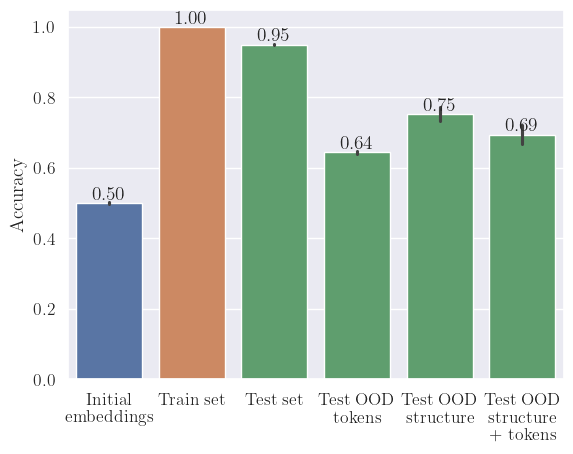

In [31]:
plt.figure()
ax = sns.barplot(data=df, x='Type', y='Accuracy', hue='type_hue', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=14)
plt.xlabel('')
plt.savefig('figures/exp_transformers.pdf', bbox_inches='tight')
plt.show()